# Подготовка

In [1]:
# Импортируем нужные библиотеки
import pandas as pd 
import requests 
from urllib.parse import urlencode 
import seaborn as sns
import numpy as np

In [2]:
# Объявим нужные функции

#Функция для получения датафрейма по ссылке на яндекс диск
def get_df_rom_ya_disk(public_key):
    # Используем api 
    base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?' 
 
    # Получаем url 
    final_url = base_url + urlencode(dict(public_key=public_key)) 
    response = requests.get(final_url) 
    download_url = response.json()['href'] 
 
    # Загружаем файл в df 
    download_response = requests.get(download_url) 
    return pd.read_csv(download_url, sep=',') 

In [3]:
# Считываем все файлы
assessments = get_df_rom_ya_disk('https://disk.yandex.ru/d/iSVP1sZ7AdW7TQ')
courses = get_df_rom_ya_disk('https://disk.yandex.ru/d/jmJxR8yhwCXlaw')
studentAssessment = get_df_rom_ya_disk('https://disk.yandex.ru/d/DYd4M5b_8RETsA')
studentRegistration = get_df_rom_ya_disk('https://disk.yandex.ru/d/lqHnH8NOZ458iw')

# Изучим данные

## assessments
### Анализ

In [4]:
# Общее
# Посмотрим размеры таблицы
print('Размер таблицы:', assessments.shape, '\n')
# Посмотрим верх таблицы
print('Первые 5 строк:\n', assessments.head(5), '\n')
# Посмотрим типы
print('Типы переменных:\n', assessments.dtypes, '\n')
# Посмотрим пропуски
print('Наличие пропусков:\n', assessments.isna().sum(), '\n')

Размер таблицы: (206, 6) 

Первые 5 строк:
   code_module code_presentation  id_assessment assessment_type   date  weight
0         AAA             2013J           1752             TMA   19.0    10.0
1         AAA             2013J           1753             TMA   54.0    20.0
2         AAA             2013J           1754             TMA  117.0    20.0
3         AAA             2013J           1755             TMA  166.0    20.0
4         AAA             2013J           1756             TMA  215.0    30.0 

Типы переменных:
 code_module           object
code_presentation     object
id_assessment          int64
assessment_type       object
date                 float64
weight               float64
dtype: object 

Наличие пропусков:
 code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64 



Курсы и формы контроля:
 FFF    52
BBB    42
DDD    35
GGG    30
CCC    20
EEE    15
AAA    12
Name: code_module, dtype: int64 

Семестры и формы контроля:
 2014J    57
2014B    57
2013J    53
2013B    39
Name: code_presentation, dtype: int64 

Количество форм контроля: 206 

Виды контроля:
 TMA     106
CMA      76
Exam     24
Name: assessment_type, dtype: int64 

Основные статистики по дедлайнам:
 count    195.000000
mean     145.005128
std       76.001119
min       12.000000
25%       71.000000
50%      152.000000
75%      222.000000
max      261.000000
Name: date, dtype: float64 

Курсы без дедлайна:
     code_module code_presentation  id_assessment assessment_type  date  weight
5           AAA             2013J           1757            Exam   NaN   100.0
11          AAA             2014J           1763            Exam   NaN   100.0
23          BBB             2013B          14990            Exam   NaN   100.0
35          BBB             2013J          15002            Exam   NaN  

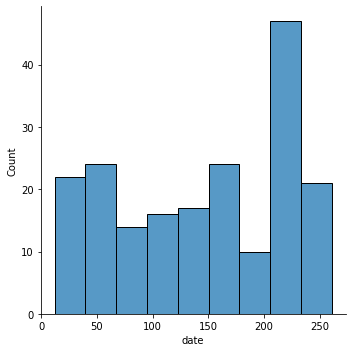

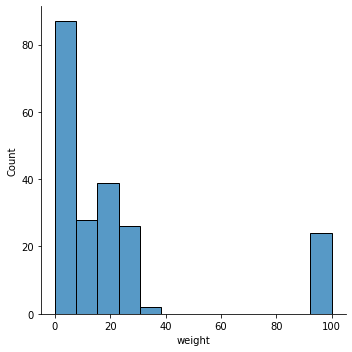

In [5]:
# Изучим подробнее все переменные

#code_module
#Уникальные значения
print('Курсы и формы контроля:\n', assessments.code_module.value_counts(), '\n')

#code_presentation
#Уникальные значения
print('Семестры и формы контроля:\n', assessments.code_presentation.value_counts(), '\n')
      
#id_assessment
#Количество различных индексов
print('Количество форм контроля:', len(assessments.id_assessment.unique().tolist()), '\n')

#assessment_type
#Уникальные значения
print('Виды контроля:\n', assessments.assessment_type.value_counts(), '\n')

#date         
#Посмотрим основные статистики
print('Основные статистики по дедлайнам:\n', assessments.date.describe(), '\n')
sns.displot(data = assessments, x = 'date')
# Посмотрим, что за пропуски
as_nodate = assessments.query('date.isnull()')
print('Курсы без дедлайна:\n', as_nodate, '\n')

#weight
#Посмотрим основные статистики
print(':\n', assessments.weight.describe())
sns.displot(data = assessments, x = 'weight')

### Интересное
- 7 предметов
- 4 семестра
- 206 форм контроля
- 3 вида контроля
- 11 пропусков в колонке date - всё соответствует экзаменам, возможно они не состоялись
- выше есть картинки распределений весов и дат
### Созданные переменные
- as_nodate (df) - формы контроля без дедлайна

## courses
### Анализ

In [5]:
# Общее
# Посмотрим размеры таблицы
print('Размер таблицы:', courses.shape, '\n')
# Посмотрим верх таблицы
print('Первые 5 строк:\n', courses.head(5), '\n')
# Посмотрим типы
print('Типы переменных:\n', courses.dtypes, '\n')
# Посмотрим пропуски
print('Наличие пропусков:\n', courses.isna().sum(), '\n')

Размер таблицы: (22, 3) 

Первые 5 строк:
   code_module code_presentation  module_presentation_length
0         AAA             2013J                         268
1         AAA             2014J                         269
2         BBB             2013J                         268
3         BBB             2014J                         262
4         BBB             2013B                         240 

Типы переменных:
 code_module                   object
code_presentation             object
module_presentation_length     int64
dtype: object 

Наличие пропусков:
 code_module                   0
code_presentation             0
module_presentation_length    0
dtype: int64 



Курсы и семестры, где они есть:
 FFF    4
DDD    4
BBB    4
EEE    3
GGG    3
CCC    2
AAA    2
Name: code_module, dtype: int64 

Семестры и курсы в них:
 2014J    7
2014B    6
2013J    6
2013B    3
Name: code_presentation, dtype: int64 

Основные статистики по длительности курса/семестра:
 count     22.000000
mean     255.545455
std       13.654677
min      234.000000
25%      241.000000
50%      261.500000
75%      268.000000
max      269.000000
Name: module_presentation_length, dtype: float64


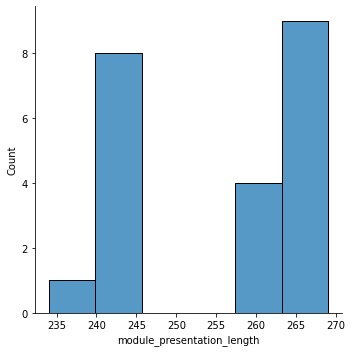

In [6]:
# Изучим подробнее все переменные

#code_module
#Уникальные значения
print('Курсы и семестры, где они есть:\n', courses.code_module.value_counts(), '\n')

#code_presentation
#Уникальные значения
print('Семестры и курсы в них:\n', courses.code_presentation.value_counts(), '\n')

#module_presentation_length
#Посмотрим основные статистики
print('Основные статистики по длительности курса/семестра:\n', courses.module_presentation_length.describe())
sns.displot(data = courses, x = 'module_presentation_length')

### Интересное
- Количество предметов и семестров совпадает с предыдущей таблицей (это хорошо)
- У каждого предмета было от 2 до 4 запусков
- В каждом семестре было от 3 до 7 предметов
- Сумма дней в семестрах одного года больше 365 - видимо, это не классические вузовские семестры, а скорее какие-то потоки набора, какая-то часть двух семестров идёт параллельно

## studentAssessment
### Анализ

In [7]:
# Общее
# Посмотрим размеры таблицы
print('Размер таблицы:', studentAssessment.shape, '\n')
# Посмотрим верх таблицы
print('Первые 5 строк:\n', studentAssessment.head(5), '\n')
# Посмотрим типы
print('Типы переменных:\n', studentAssessment.dtypes, '\n')
# Посмотрим пропуски
print('Наличие пропусков:\n', studentAssessment.isna().sum(), '\n')

Размер таблицы: (173912, 5) 

Первые 5 строк:
    id_assessment  id_student  date_submitted  is_banked  score
0           1752       11391              18          0   78.0
1           1752       28400              22          0   70.0
2           1752       31604              17          0   72.0
3           1752       32885              26          0   69.0
4           1752       38053              19          0   79.0 

Типы переменных:
 id_assessment       int64
id_student          int64
date_submitted      int64
is_banked           int64
score             float64
dtype: object 

Наличие пропусков:
 id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64 



#Количество различных форм контроля 188 

Элементы оценивания, которых нет в пуле:
 Empty DataFrame
Columns: [id_assessment, id_student, date_submitted, is_banked, score]
Index: [] 

Элементы, которые никто не сдал:
     code_module code_presentation  id_assessment assessment_type   date  \
5           AAA             2013J           1757            Exam    NaN   
11          AAA             2014J           1763            Exam    NaN   
23          BBB             2013B          14990            Exam    NaN   
35          BBB             2013J          15002            Exam    NaN   
47          BBB             2014B          15014            Exam    NaN   
53          BBB             2014J          15025            Exam    NaN   
63          CCC             2014B          40087            Exam    NaN   
73          CCC             2014J          40088            Exam    NaN   
113         EEE             2013J          30713            Exam  235.0   
118         EEE             2014B

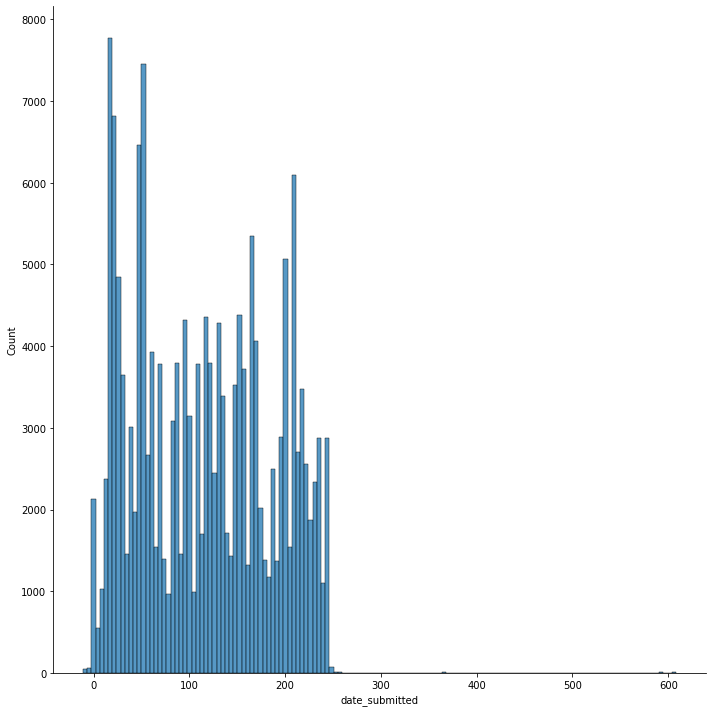

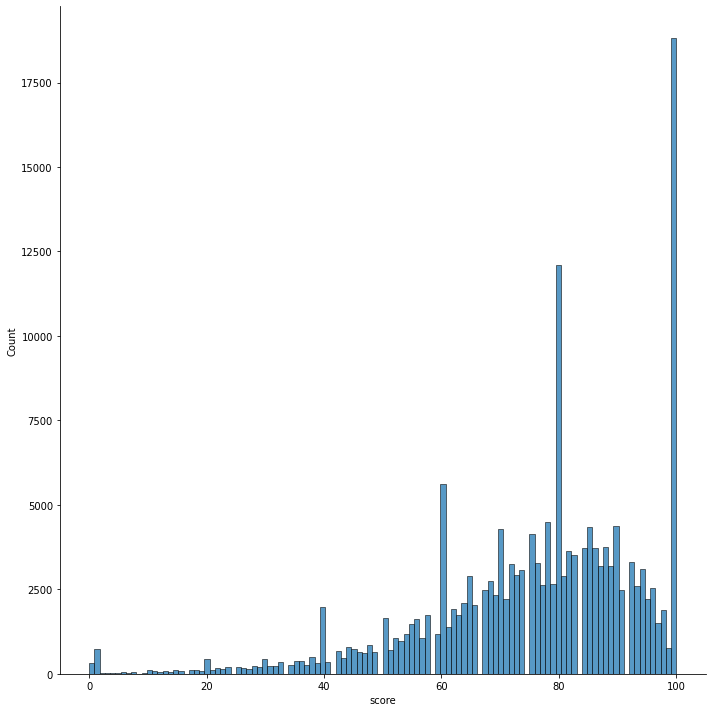

In [10]:
# Изучим подробнее все переменные

#id_assessment
#Количество различных форм контроля
print('#Количество различных форм контроля', len(studentAssessment.id_assessment.unique().tolist()), '\n')
# Хммм, элементов оценивания меньше... Давайте посмотрим каких элементов из общего пула нет
# Но сначала глянем, вдруг есть элементы оценивания, которых нет в общем пуле
print('Элементы оценивания, которых нет в пуле:\n', 
                              studentAssessment.query('id_assessment not in @assessments.id_assessment'), '\n')
# Таких нет, хорошо
# Давайте посмотрим каких элементов из общего пула нет
abs_as = assessments.query('id_assessment not in @studentAssessment.id_assessment')
print('Элементы, которые никто не сдал:\n', abs_as, '\n')
abs_as = abs_as.id_assessment
# Хм. Интересно. Здесь почти все тесты без даты + ещё несколько
# Давайте сравним
no_date_but_taken = as_nodate.query('id_assessment not in @abs_as')
print('Нет дедлайна, но сдали:\n',no_date_but_taken, '\n')
# Таких элемента 3... Давайте посмотрим, какая вообще инфа по ним есть в этой таблице
print("Результаты элементов контроля по которым не стояли дедлайны:\n",
    studentAssessment\
    .query('id_assessment in @no_date_but_taken.id_assessment')\
    .groupby('id_assessment', as_index = True)\
    .score.describe(), '\n'
)
# Ну, их сдавали. Возможно просто не было в таблице в с формами контроля дедлайна этого экзамена, поэтому там NA, 
# но при этом их сдавали
# Что до элементов, у которых есть дедлайн в таблице со всеми формами контроля, а тут нет. Видимо их не сдал никто
# Возможно курс был отменён
# Что до элементов, у которых нет дедлайна и нет в этой таблице - их скорее всего никто не сдавал

#id_student
# Сколько уникальных студентов
print("Сколько уникальных студентов, которые проходили формы контроля:",len(studentAssessment.id_student.unique().tolist()))

#date_submitted
# Посмотрим основные статистики
print('Основные статистики по дню сдачи:\n', studentAssessment.date_submitted.describe())
sns.displot(data = studentAssessment, x = 'date_submitted', height = 10)
# Хм, есть те, кто сдал форму контроля раньше начала семестра

#is_banked
#Уникальные значения
print('Перезачтённые курсы:\n', studentAssessment.is_banked.value_counts(normalize = True), '\n')

#score
# Посмотрим основные статистики
print('Основные статистики по оценке:\n', studentAssessment.score.describe())
sns.displot(data = studentAssessment, x = 'score', height = 10)

### Интересное
- Количество элементов оценивания меньше чем в таблице assessments на (18)
- Но все элементы оценивания есть в таблице assessments
- Есть элементы, которые никто не сдавал
- Есть элементы без дедлайна, которые кто-то сдал
- Есть те, кто сдал форму контроля раньше начала семестра... Причём это не те штуки, которые были перезачтены
- Распределение оценок смещено в сторону высоких оценок, с тремя модами (возможно это связано с тем, что если форма не сдавалась, то в таблицу она не заносилась, поэтому в таблице нет инфы о потенциально нулевых экзаменах)
### Созданные переменные
- abs_as (list) - формы, контроля оценок по которымм нет в базе
- no_date_but_taken (df) - формы контроля без дедлайна, которые кто-то сдал

## studentRegistration
### Анализ

In [8]:
# Общее
# Посмотрим размеры таблицы
print('Размер таблицы:', studentRegistration.shape, '\n')
# Посмотрим верх таблицы
print('Первые 5 строк:\n', studentRegistration.head(5), '\n')
# Посмотрим типы
print('Типы переменных:\n', studentRegistration.dtypes, '\n')
# Посмотрим пропуски
print('Наличие пропусков:\n', studentRegistration.isna().sum(), '\n')

Размер таблицы: (32593, 5) 

Первые 5 строк:
   code_module code_presentation  id_student  date_registration  \
0         AAA             2013J       11391             -159.0   
1         AAA             2013J       28400              -53.0   
2         AAA             2013J       30268              -92.0   
3         AAA             2013J       31604              -52.0   
4         AAA             2013J       32885             -176.0   

   date_unregistration  
0                  NaN  
1                  NaN  
2                 12.0  
3                  NaN  
4                  NaN   

Типы переменных:
 code_module             object
code_presentation       object
id_student               int64
date_registration      float64
date_unregistration    float64
dtype: object 

Наличие пропусков:
 code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64 



Предметы и за-/отписавшиеся на них:
   code_module  date_registration  date_unregistration
0         AAA                748                  126
1         BBB               7900                 2377
2         CCC               4426                 1947
3         DDD               6257                 2235
4         EEE               2932                  718
5         FFF               7751                 2380
6         GGG               2534                  289 

Семестры и за-/отписавшиеся во время них:
   code_presentation  date_registration  date_unregistration
0             2013B               4676                 1347
1             2013J               8835                 2376
2             2014B               7786                 2610
3             2014J              11251                 3739 

Сколько уникальных студентов, которые записывались на курс: 28785
Основные статистики по записи на курус:
 count    32548.000000
mean       -69.411300
std         49.260522
min       -

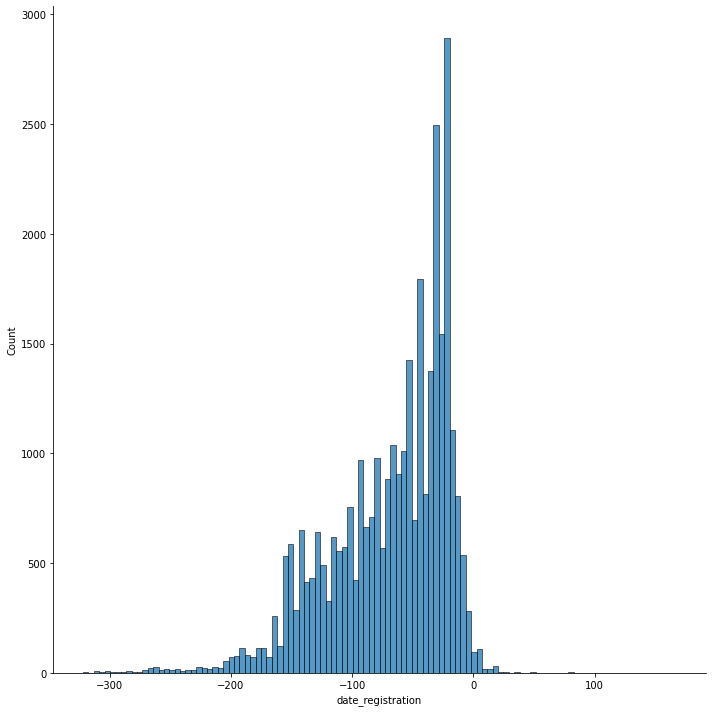

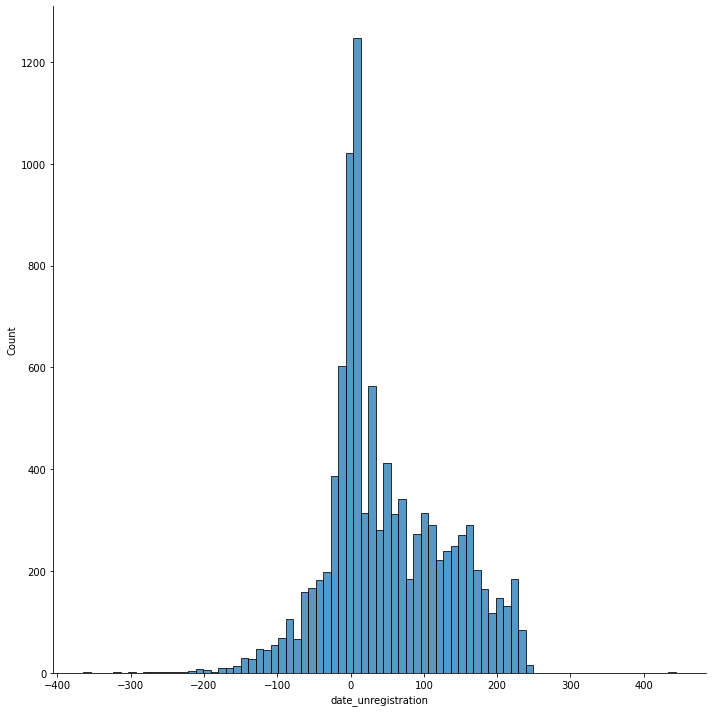

In [9]:
# Изучим подробнее все переменные

#code_module
#Сколько за-/отписалось
reg_count_module = studentRegistration\
    .groupby('code_module', as_index = False)[['date_registration', 'date_unregistration']]\
    .agg({'date_registration':'count','date_unregistration':'count'})
print('Предметы и за-/отписавшиеся на них:\n', reg_count_module, '\n')

#code_presentation
#Сколько за-/отписалось
reg_count_pres = studentRegistration\
    .groupby('code_presentation', as_index = False)[['date_registration', 'date_unregistration']]\
    .agg({'date_registration':'count','date_unregistration':'count'})
print('Семестры и за-/отписавшиеся во время них:\n', reg_count_pres, '\n')

#id_student
# Сколько уникальных студентов
print("Сколько уникальных студентов, которые записывались на курс:",len(studentRegistration.id_student.unique().tolist()))

#date_registration
# Посмотрим основные статистики
print('Основные статистики по записи на курус:\n', studentRegistration.date_registration.describe())
sns.displot(data = studentRegistration, x = 'date_registration', height = 10)

#date_unregistration
# Посмотрим основные статистики
print('Основные статистики по отказу от курса:\n', studentRegistration.date_unregistration.describe())
sns.displot(data = studentRegistration, x = 'date_unregistration', height = 10)

### Интересное
- Все те-же 7 курса и 4 семестра
- Есть тенденция у студентов записываться на курс не задолго до начала курса и отписываться скорее вначале курса
### Созданные переменные
- reg_count_module (df) - предметы и за-/отписавшиеся от них
- reg_count_pres (df) - модули и за-/отписавшиеся от них

# Вопросы/задачи
## Что считается курсом?
### Решение

In [14]:
# Исследуя данные я заметил некоторые интересные особенности. Есть экзаменые, которые должны были состояться, но не состоялись
# Причины могут быть разные - предмет отменён, до конца семестра все отписались и др...
# Это может нам дать ключ к тому, что считать курсом
# Я предлагаю считать курсом каждое уникальное сочетание предмета и семестра, где:
# 1. Хотя бы один студент получил оценку за итоговый экзамен (может быть ноль)
# 2. Хотя бы один студент не отичислился до конца курса

# Из анализа таблицы courses мы знаем о том, что курсов было потенциально 22

# Посмотрим, сколько экзаменов должно было быть из таблицы assessments для каждого курса
ex_deadline = assessments.query('assessment_type == "Exam"')\
    .groupby(['code_module','code_presentation'], as_index = False)[['assessment_type','date']]\
    .agg(['count'])\
    .rename(columns = {'assessment_type':'Total','date':'With_deadline'})
print('Информация о курсах с делайнами и без:\n',ex_deadline, '\n')

# Посмотрим, за сколько экзаменов хотя бы один студент получил оценку по таблице studentAssessment

# Список экзаменов
exes = assessments.query('assessment_type == "Exam"')['id_assessment'].tolist()
print('Количество экзаменов всего:', len(exes),'\n')

# У скольких человек есть оценка по экзамену
ex_subm = studentAssessment.query('id_assessment in @exes')\
    .groupby('id_assessment', as_index = False)['score']\
    .agg('count')\
    .rename(columns = {'score':'submitted'})

print('Информация об экзаменах с полученными оценками:\n', ex_subm, '\n')

print('Курсы, где есть экзамены, за которые кто-то получил оценки:\n',
      assessments.query('id_assessment in @ex_subm.id_assessment.tolist()'),'\n')

# Всего из 22 курсов остаётся 6 уникальных, что заставило меня задуматься
# Возможно сдача экзамена не обязательна, 
# возможно можно закрыть курс другими тестами, получив автомат
# В описании у нас сказано, что экзаменом курс завершается обычно, но не всегда
# Может у всех автотам был. Условие экзамена уберём
# Можно ли считать курсом предмет, который никто не смог закрыть?
# Теоретически да...

# Тогда обновим наше представление:

# Я предлагаю считать курсом каждое уникальное сочетание предмета и семестра, где:
# 1. Хотя бы один студент не отичислился до конца курса

# Возьмём из таблицы studentRegistration те сочетание семестра и предмета, где
# есть хотя бы один студент с NaN в date_unregistration

# Курсы и количество их закончивших студентов
finished_courses = studentRegistration[studentRegistration['date_unregistration'].isna()]\
    .groupby(['code_module','code_presentation'], as_index = False)[['id_student']]\
    .agg(['count'])\
    .rename(columns = {'id_student':'finished'})

print('Курсы и количество их закончивших студентов:\n',finished_courses,'\n')
print('Количество курсов, которые кто-то закончил:',len(finished_courses),'\n')
# Число совпало с числом курсов из таблицы курсов

# Давайте на всякий случай посмотрим, сколько баллов студенты набрали за каждый курс:

# Возьмём таблицу с оценками студентов и приджоиними тим теста, его вес, семестр и предмет
st_marks = studentAssessment.merge(assessments[['id_assessment','code_module','code_presentation','assessment_type','weight']], 
                        on = 'id_assessment', how = 'left')

# Посмотрим сколько на всякий случай курсов, где были какие-то тесты
print('Курсы, где есть хоть какие-то тесты:',len(st_marks.groupby(['code_module','code_presentation']).agg('count')), '\n')

# Уберём строки с элементом контроля с нулевым весом
st_marks0 = st_marks\
    .query('weight > 0')
# Посмотрим сколько таких курсов
print('Курсов с итоговой оценкой:', len(st_marks0.groupby(['code_module','code_presentation']).agg('count')))
# Расхождение

# Посмотрим, кто выбивается
print('Курсы без итоговой оценки', st_marks.groupby(['code_module','code_presentation'], as_index = False).agg('sum')\
      .query('weight == 0')[['code_module','code_presentation']], '\n')
# Угу, предмет G не оценивается...

# Интересно/ Чтобы его не терять, не будет вычищать элементы оценивания меньше нуля

# Ещё проверим, были ли какие формы контроля сданы сдудентом дважды
# Группируем по студенту и тесту и считаем количество срок какого-нибудь поля без пропусков (перезачёт)
# Выводим максимум
print('Максимальное количество прохождения форм контроля одним студентом:',
      st_marks.groupby(['id_assessment','id_student'], as_index = False)['is_banked'].agg('count').max()['is_banked'], '\n')
# Максимум 1, тесты не пересдавались

# Посчитаем оценки студентов по экзаменам:
st_marks_exam = st_marks.query('assessment_type == "Exam"')\
    .groupby(['id_student','code_module','code_presentation'], as_index = False)['score']\
    .agg('sum')\
    .rename(columns = {'score':'ex_score'})
print('Оценки студентов по экзаменам:\n', st_marks_exam, '\n')

# Посчитаем накопленную оценку
# Прежде чем это сделать, договоримся вот о чём. 
# Накопленная = сумма (оценок за тесты на их веса)
# Можно было иначе посчитать, как сумму весов сданных тестов (это было бы проще),
# Но все мои примеры в жизни свидетельствуют о первом варианте

# Оценка домноженная на вес
st_marks['score_weigthed'] = st_marks.score*st_marks.weight/100
# Оценка по накому
st_marks_col = st_marks.query('assessment_type != "Exam"')\
    .groupby(['id_student','code_module','code_presentation'], as_index = False)['score_weigthed']\
    .agg('sum')\
    .rename(columns = {'score_weigthed':'col_score'})

# Теперь сделаем столбец для итоговой оценки (максимальной из экзамена и накопа)
# Соберём все оценки
st_marks_all = st_marks_col\
    .merge(st_marks_exam, on = ['id_student','code_module','code_presentation'], how = 'outer')
# Добавим итоговую оценку
st_marks_all['res_score'] = st_marks_all[['col_score', 'ex_score']].max(axis = 1)

# Сгруппируем по курсам и посмотрим максимальную итоговую оценку
# Если для всех 22 курсов она > 40, то тогда каждый курс закончил по крайней мере 1 человек
print('Максимальная оценка за курс (накоп/экзамен)\n',st_marks_all\
      .groupby(['code_module','code_presentation'], as_index = False)['res_score'].max(),'\n')

# Ну, логично. Значит остаётся решить, является ли неоцениваемый курс курсом...
# Ну, как-будто да... Решающее в курсе всё-таки обучение

Информация о курсах с делайнами и без:
                               Total With_deadline
                              count         count
code_module code_presentation                    
AAA         2013J                 1             0
            2014J                 1             0
BBB         2013B                 1             0
            2013J                 1             0
            2014B                 1             0
            2014J                 1             0
CCC         2014B                 2             0
            2014J                 2             0
DDD         2013B                 1             1
            2013J                 1             1
            2014B                 1             1
            2014J                 1             0
EEE         2013J                 1             1
            2014B                 1             1
            2014J                 1             1
FFF         2013B                 1             1
          

### Ответ:
#### Курс - это уникальное сочетание предмета и семестра, которое есть в таблице courses и удовлетворяет условие, что есть хотя-бы один студент с этого курса не отчислился
Этому утверждению удовлетворяют все курсы в таблице courses, но важно учесть, чтобы решение было более в общем случае
Можно было бы его снять, однако я подумал, что для наших случаев для аналитики были бы более релевантны курс состоявшиеся
Другие можно рассмотреть отдельно,если бы они были

### Интересные наблюдения полученные в процессе поиска ответа:
- Есть курсы, где нет итоговой оценки (предмет GGG)
- Формы контроля не пересдавались

### Созданные переменные
- ex_deadline (df) - курсы и количество экзаменов на них (всего/с дедлайнами)
- exes (list) - список экзаменов
- ex_subm (df) - экзамены и количество сдавших эту работу
- finished_courses (df) - курсы и количество студентов, которые их закончили
- st_marks (df) - оценки, студенты, тип теста, семестр, предмет, веса, взвешенные оценки
- st_marks0 (df) - st_marks только с формами контроля с весом больше 0
- st_marks_exam (df) - оценки студентов по экзаменам
- st_marks_col (df) - оценки студентов по накопу
- st_marks_all (df) - оценки студентов по экзамену, накопу и итог (макс из предыдущих)

## Сколько студентов успешно сдали только один курс?
(Успешная сдача — это зачёт по курсу на экзамене)

### Решение

In [48]:
# Возьмём табличку с итоговыми оценками из прошлого вопроса и выберем те строки, 
# где оценка по экзамену > 40
st_passed_ex = st_marks_all.query('ex_score >= 40')

# Из предыдущего обзора мы знаем, что в курсе состоится только один экзамен
# Лишние из таблички с курсами не состоялись
# Так что просто сгруппируем по студенту и посчитаем количество строк

ex_passed_per_us = st_passed_ex\
    .groupby('id_student', as_index = False)['ex_score']\
    .agg('count')\
    .rename(columns = {'ex_score':'courses_passed'})
print('Количество студентов, кто сдал один курс:',
      len(ex_passed_per_us.query('courses_passed == 1')),'\n')

Количество студентов, кто сдал один курс: 3802 



### Ответ:

3802

### Интересные наблюдения полученные в процессе поиска ответа:

Никто не сдал более двух экзаменов

### Созданные переменные
- st_passed_ex (df) - студенты и сданные экзамены
- st_passed_ex_per_us (df) - студенты и количество сданных экзаменов

## Выявить самый сложный и самый простой экзамен: найти курсы и экзамены в рамках курса, которые обладают самой низкой и самой высокой завершаемостью. (10 баллов)
**завершаемость** = кол-во успешных экзаменов / кол-во всех попыток сдать экзамен

### Решение

In [17]:
# Возьмём табличку из нулевого вопроса и выберем строки, где была попытка сдать экзамен
st_tried_to_pass_ex = st_marks_all[st_marks_all['ex_score'].notnull()]

# Сделаем флаг для сдачи экза
st_tried_to_pass_ex = st_tried_to_pass_ex.assign(pas = st_tried_to_pass_ex.ex_score >= 40)

# Посчитаем отдельно и приджоиним

# Попыток
tot = st_tried_to_pass_ex\
    .groupby(['code_module','code_presentation'], as_index = False)['pas']\
    .agg('count')\
    .rename(columns = {'pas':'tot'})
# Попыток успешных
pas = st_tried_to_pass_ex\
    .query('pas == True')\
    .groupby(['code_module','code_presentation'], as_index = False)['pas']\
    .agg('count')
st_tried_to_pass_ex = tot.merge(pas, on = ['code_module','code_presentation'])

st_tried_to_pass_ex['passage'] = st_tried_to_pass_ex.pas/st_tried_to_pass_ex.tot

st_tried_to_pass_ex = st_tried_to_pass_ex\
    .merge(assessments.query('id_assessment in @exes'),
           on = ['code_module','code_presentation'], how = 'left')
st_tried_to_pass_ex = st_tried_to_pass_ex[['code_module','code_presentation','id_assessment','passage']]

# Самый сложный: 
print('Самый сложный + экзамен:\n', 
      st_tried_to_pass_ex[st_tried_to_pass_ex['passage'] == st_tried_to_pass_ex['passage'].min()],
                         '\n')

# Самый простой:
print('Самый простой курс + экзамен:\n',
      st_tried_to_pass_ex[st_tried_to_pass_ex['passage'] == st_tried_to_pass_ex['passage'].max()],
                         '\n')

Самый сложный + экзамен:
   code_module code_presentation  id_assessment   passage
4         DDD             2013B          25340  0.837209 

Самый простой курс + экзамен:
   code_module code_presentation  id_assessment   passage
6         DDD             2014B          25361  0.925573 



### Ответ:

Самый простой - курс семестра 2013B по предмету DDD (id экзамена 25340)

Самый сложный - курс семестра 2014B по предмету DDD (id экзамена 25361)

### Интересные наблюдения полученные в процессе поиска ответа:

- И самый простой, и самый сложный курсы по одному и тому-же предмету
- Даже у самого сложного курса процент закрытия > 83%
- Разница завершаемости между самым сложным и самым простым где-то 9%

### Созданные переменные
- tot (df) - попыток сдать каждый экзамен
- pas (df) - успеншных попыток сдать экзамен
- st_tried_to_pass_ex (df) - курс и процент сдачи

## По каждому предмету определить средний срок сдачи экзаменов (под сдачей понимаем последнее успешное прохождение экзамена студентом)

In [63]:
# Вопрос про предмет, ранее мы работали с курсами. Подразумевается ли
# тождество этих конструктов? По моему опредлению курса - нет, однако 
# составители курса вопрос составили ранеше... Может и подразумевается...
# Сделаю оба варианта

# Возьмём информацию о сдаче форм контроля
# Добавим информацию о предмете, семестре, типе экзамена
# Отфильтруем инфу по сданным экзамен
# Сбросим индексы
# Оставим предмет, семестрф, id пользователя и дату сдачи
# Посчитаем максимальное время сдачи для каждого пользователя в каждый курс
# Вообще выше мы видели, что формы контроля не пересдавались
# И что в каждый курс был только один экзамен но лучше сделать более общее решение

ex_pas_dt = studentAssessment.merge(assessments, on = 'id_assessment', how='left')\
    .query('assessment_type == "Exam" & score >= 40')\
    .reset_index()\
    [['code_module','code_presentation','id_student','date_submitted']]\
    .groupby(['code_module','code_presentation','id_student'], as_index = False)\
    .agg('max')

# Посмотрим для курсов
ex_pas_dt_per_course = ex_pas_dt.groupby(['code_module','code_presentation'], as_index = False)['date_submitted']\
    .agg('mean')\
    .rename(columns = {'date_submitted':'avg_date_submitted'})                
ex_pas_dt_per_course.avg_date_submitted = ex_pas_dt_per_course.avg_date_submitted.round(1)

print('Среднее время сдачи экзамена на курсе:\n',ex_pas_dt_per_course,'\n')

# Посмотрим для предметов

ex_pas_dt_per_subj = ex_pas_dt.groupby(['code_module'], as_index = False)['date_submitted']\
    .agg('mean')\
    .rename(columns = {'date_submitted':'avg_date_submitted'})                
ex_pas_dt_per_subj.avg_date_submitted = ex_pas_dt_per_subj.avg_date_submitted.round(1)

print('Среднее время сдачи экзамена на курсе:\n',ex_pas_dt_per_subj,'\n')


Среднее время сдачи экзамена на курсе:
   code_module code_presentation  avg_date_submitted
0         CCC             2014B               231.6
1         CCC             2014J               244.4
2         DDD             2013B               230.2
3         DDD             2013J               239.5
4         DDD             2014B               234.9
5         DDD             2014J               242.8 

Среднее время сдачи экзамена на курсе:
   code_module  avg_date_submitted
0         CCC               239.3
1         DDD               238.0 



### Ответ:

**Среднее время сдачи предмета CCC 239.3 дня**
- 2014B - 231.6; 
- 2014J - 244.4

**Среднее время сдачи предмета DDD 238.0 дня**
- 2013B - 230.2; 
- 2013J - 239.5; 
- 2014B - 234.9; 
- 2014J - 242.8

### Интересные наблюдения полученные в процессе поиска ответа:

### Созданные переменные
- ex_pas_df (df) - дата сдачи экзаменов по курсам, для каждого модуля
- ex_pas_dt_per_course (df) - среднее время сдачи экзамена по курсу
- ex_pas_dt_per_subj (df) - среднее время сдачи экзамена по предмету

## Выявить самые популярные предметы (ТОП-3) по количеству регистраций на них. 
## А также предметы с самым большим оттоком (ТОП-3)

**отток** = отписалось/записалось*100%
(так учтём отличия в кол-во записавшихся)

### Решение

In [85]:
# Аналогично прошло вопросу здесь актуальа диллема курс/предмет
# Тоже посчитаю для обоих

# Для предметов уже подсчитано ранее, только добавим отток
reg_count_module['lost'] = (reg_count_module.date_unregistration*100/reg_count_module.date_registration).round(0)
# Топ-3 по подпискам
print('Топ-3 предметов по записям:\n',reg_count_module.sort_values('date_registration', ascending = False)\
      .reset_index(drop = True).head(3),'\n')
# Топ-3 по оттоку
print('Топ-3 предметов по оттоку:\n',reg_count_module.sort_values('lost', ascending = False).reset_index(drop = True)\
      .head(3),'\n')

# Для курсов сделаем и добавим отток
reg_count_module_pres = studentRegistration\
    .groupby(['code_module','code_presentation'], as_index = False)[['date_registration', 'date_unregistration']]\
    .agg({'date_registration':'count','date_unregistration':'count'})

reg_count_module_pres['lost'] = (reg_count_module_pres.date_unregistration*100/reg_count_module_pres.date_registration)\
    .round(0)
# Топ-3 по подпискам
print('Топ-3 курсов по записям:\n',reg_count_module_pres.sort_values('date_registration', ascending = False)\
      .reset_index(drop = True).head(3),'\n')
# Топ-3 по оттоку
print('Топ-3 курсов по оттоку:\n',reg_count_module_pres.sort_values('lost', ascending = False)\
      .reset_index(drop = True).head(3),'\n')

Топ-3 предметов по записям:
   code_module  date_registration  date_unregistration  lost
0         BBB               7900                 2377  30.0
1         FFF               7751                 2380  31.0
2         DDD               6257                 2235  36.0 

Топ-3 предметов по оттоку:
   code_module  date_registration  date_unregistration  lost
0         CCC               4426                 1947  44.0
1         DDD               6257                 2235  36.0
2         FFF               7751                 2380  31.0 

Топ-3 курсов по записям:
   code_module code_presentation  date_registration  date_unregistration  lost
0         CCC             2014J               2495                 1049  42.0
1         FFF             2014J               2363                  831  35.0
2         BBB             2014J               2291                  736  32.0 

Топ-3 курсов по оттоку:
   code_module code_presentation  date_registration  date_unregistration  lost
0         CCC   

### Ответ:

**Топ-3 предметом по записи:**
- BBB
- FFF
- DDD

**Топ-3 предметом по оттоку:**
- CCC
- DDD
- FFF

Топ-3 курсов по записи:
- CCC 2014J
- FFF 2014J
- BBB 2014J

Топ-3 курсов по оттоку:
- CCC 2014B
- CCC 2014J
- DDD 2014B

### Интересные наблюдения полученные в процессе поиска ответа:

### Созданные переменные
- reg_count_module (df) - обновил, добавив отток
- reg_count_module_pres (df) - аналог прошлой только с курсами

## Выявить семестр с самой низкой завершаемостью курсов и самыми долгими средними сроками сдачи курсов.

### Решение

### Ответ:


### Интересные наблюдения полученные в процессе поиска ответа:

## Построить (и подробно описать процесс) адаптированные RFM-кластеры студентов, чтобы качественно оценить свою аудиторию. 
## Для каждого RFM-сегмента построить границы метрик recency, frequency и monetary для интерпретации этих кластеров.
В адаптированной кластеризации можешь выбрать следующие метрики: 
- R - среднее время сдачи одного экзамена, 
- F - завершаемость курсов, 
- M - среднее количество баллов, получаемое за экзамен. Подробно опиши, как ты создавал кластеры.

### Решение

### Ответ:


### Интересные наблюдения полученные в процессе поиска ответа:

## Общие выводы